In [1]:
import time

from IPython.display import HTML

import numpy as np
import matplotlib.pyplot as plt
plt.rcdefaults()
import matplotlib.ticker as ticker
import torch
from tqdm import tqdm

from threedeequadsim import quadsim, controller, trajectory, experiments, utils

import importlib
importlib.reload(controller)
importlib.reload(quadsim)
importlib.reload(trajectory)

<module 'threedeequadsim.trajectory' from 'c:\\Users\\mtoc1\\Documents\\github\\Online-Meta-Adaptive-Control-OMAC-Algorithm\\quadsim\\threedeequadsim\\trajectory.py'>

In [2]:
test_name = 'hover'

In [3]:
nametag = 'final'

In [4]:
folder = './plots/' + time.strftime('%Y-%m-%d') + '/' + nametag + '/'
if not os.path.isdir(folder):
    os.makedirs(folder)
    print('Created data folder ' + folder)

Created data folder ./plots/2021-10-25/final/


In [66]:
def savefig(plottag):
    plt.savefig(folder + plottag + '.pdf', bbox_inches='tight')
# def savefig(plottag):
#     pass
xyz = ['x', 'y', 'z']

In [6]:
eta_a = 0.0075

eta_A_threshold_convex = 0.0001
eta_A_convex = eta_A_threshold_convex * 1
eta_A_biconvex = 0.0002
eta_A_deep = 0.05

dim_a = 30
dim_A = 150
layer_sizes = (100, 200)

feature_freq = 0.25

In [7]:
q_kwargs = {
    'Vwind' : np.array((0.0, 0, 0)),            # mean wind speed
    'wind_model': 'iid-uniform',                # {'iid', 'random-walk'}
    'Vwind_gust' : np.array((5.0, 0., 2.5)),    # for hard wind constrant, wind speed is in the range Vwind +/- Vwind_gust
    'wind_update_period' : 2.0,                 # seconds between wind speed changes
    't_stop' : 30.,
}

In [8]:
CTRLS = [
    controller.Baseline(integral_control=False),
    controller.MetaAdaptBaseline(eta_a_base=eta_a, dim_a=dim_a, dim_A=dim_A, feature_freq=feature_freq, A_type='random'),
    controller.MetaAdaptConvex(eta_a_base=eta_a, eta_A_base=eta_A_convex, eta_A_threshold=eta_A_threshold_convex, dim_a=dim_a, dim_A=dim_A, feature_freq=feature_freq),
    controller.MetaAdaptBiconvex(eta_a_base=eta_a, eta_A_base=eta_A_biconvex, dim_a=dim_a, dim_A=dim_A, feature_freq=feature_freq),
    controller.MetaAdaptDeep(eta_a_base=eta_a, eta_A_base=eta_A_deep, dim_a=dim_a, layer_sizes=layer_sizes),
    controller.Omniscient()
]

Initializing baseline-omac with dim_a=30, dim_A=150
Initializing convex-omac with dim_a=30, dim_A=150
Initializing biconvex-omac with dim_a=30, dim_A=150
Initializing deep-omac with dim_a=30, layer_sizes=(100, 200)


In [48]:
if CTRLS[j]._name == 'pid':
    CTRLS[j].name_long = 'No-adapt'

In [9]:
T = trajectory.hover

t_kwargs = {
    'pd' : np.zeros(3)
}

In [10]:
Data = []
num_trials = 10
starter_seed = 116
np.random.seed(starter_seed)
seeds = np.random.randint(np.iinfo(np.uint).max, size=(num_trials,), dtype=np.uint)
print(seeds)

for c in CTRLS:
    Data.append([])
    
    for seed in seeds:    
        q = quadsim.QuadrotorWithSideForce(**q_kwargs, )    # create a quadrotor object
        t = T(**t_kwargs)                                   # create a trajectory object and initialize the trajectory

        data = q.run(trajectory=t, controller=c, seed=seed) # run the simulation
                                                            # note: this will set the seed, call c.reset_controller(), then reset the seed again
        Data[-1].append(data)                               # save the results

[1611337013 2477702587 1497686908 4256396278 3988493361 2177443886
  125145986 1797239210   10700959 1674216961]


3001it [00:38, 78.84it/s]                            
3001it [00:37, 79.53it/s]                            
3001it [00:38, 77.30it/s]                            
3001it [00:38, 77.66it/s]                            
3001it [00:38, 77.84it/s]                            
3001it [00:40, 74.16it/s]                            
3001it [00:45, 65.94it/s]                            
3001it [00:40, 73.53it/s]                            
3001it [00:36, 82.00it/s]
3001it [00:36, 82.50it/s]                            


(150, 30)


3001it [00:37, 79.08it/s]                            


(150, 30)


3001it [00:37, 80.84it/s]


(150, 30)


3001it [00:37, 80.96it/s]                            


(150, 30)


3001it [00:36, 81.12it/s]


(150, 30)


3001it [00:37, 80.71it/s]                            


(150, 30)


3001it [00:37, 80.85it/s]                            


(150, 30)


3001it [00:37, 80.96it/s]                            


(150, 30)


3001it [00:37, 80.83it/s]                            


(150, 30)


3001it [00:36, 81.12it/s]                            


(150, 30)


3001it [00:38, 77.41it/s]                            
3001it [00:38, 77.25it/s]                            
3001it [00:38, 78.53it/s]                            
3001it [00:38, 78.34it/s]                            
3001it [00:38, 77.57it/s]                            
3001it [00:37, 79.62it/s]                            
3001it [00:38, 78.72it/s]                            
3001it [00:37, 79.67it/s]                            
3001it [00:37, 78.99it/s]                            
3001it [00:37, 79.77it/s]                            
3001it [00:37, 79.84it/s]                            
3001it [00:38, 78.18it/s]                            
3001it [00:38, 78.06it/s]                            
3001it [00:38, 78.04it/s]                            
3001it [00:38, 77.79it/s]
3001it [00:37, 79.19it/s]                            
3001it [00:37, 81.09it/s]                            
3001it [00:38, 77.67it/s]
3001it [00:38, 77.93it/s]                            
3001it [00:38, 78.31it/s]     

In [11]:
## THIS IS NOT THE ACE (average control error)! This error is only mean position error, where ACE includes velocity
# print('%-20s, %6s, %15s' % ('Controller', 'RMSE', 'Steady State RMSE'))

stats = []
for c, data in zip(CTRLS, Data): # this doesn't work if you only have one controller...
    stats.append([0., 0.])
    for d in data:
        err = experiments.get_error(d['X'], d['pd'])
        err_ss = experiments.get_error(d['X'], d['pd'], istart=1000) # ss=steady state
        print('%-20s, %5.4f, %5.4f' % ('-----' + c._name, err['meanerr'], err_ss['meanerr']))
        stats[-1][0] += err['meanerr']
        stats[-1][1] += err_ss['meanerr']
    stats[-1][0] /= len(data)
    stats[-1][1] /= len(data)
    print('%-20s, %5.4f, %5.4f' % (c._name, stats[-1][0], stats[-1][1]))

Controller          ,   RMSE, Steady State RMSE
-----pid            , 0.2748, 0.2794
-----pid            , 0.2824, 0.2718
-----pid            , 0.2911, 0.3355
-----pid            , 0.2546, 0.2558
-----pid            , 0.2461, 0.2609
-----pid            , 0.2617, 0.2531
-----pid            , 0.2766, 0.2468
-----pid            , 0.2853, 0.3059
-----pid            , 0.2292, 0.2367
-----pid            , 0.2964, 0.3232
pid                 , 0.2698, 0.2769
-----baseline-omac  , 0.1968, 0.1933
-----baseline-omac  , 0.2123, 0.2018
-----baseline-omac  , 0.1849, 0.2144
-----baseline-omac  , 0.1824, 0.1867
-----baseline-omac  , 0.1836, 0.1924
-----baseline-omac  , 0.2047, 0.1968
-----baseline-omac  , 0.1679, 0.1569
-----baseline-omac  , 0.1475, 0.1435
-----baseline-omac  , 0.1610, 0.1767
-----baseline-omac  , 0.2091, 0.2210
baseline-omac       , 0.1850, 0.1883
-----convex-omac    , 0.1320, 0.1318
-----convex-omac    , 0.1594, 0.1615
-----convex-omac    , 0.1536, 0.1679
-----convex-omac    , 0.151

In [13]:
color = ((1,0,0), (0,1,0), (0,0,1)) # colors for x, y and z directions

pid
baseline-omac
baseline-omac
convex-omac
convex-omac
biconvex-omac
biconvex-omac
deep-omac
deep-omac
omniscient
omniscient


C:\Users\mtoc1\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\mtoc1\Anaconda3\lib\site-packages\ipykernel_launcher.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\mtoc1\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

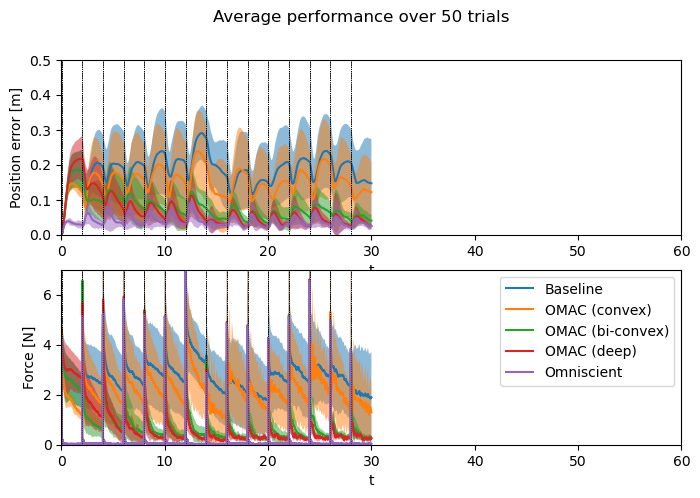

In [17]:
stats = {'p_stats': [], 'f_stats': []}
plt.figure(figsize=(8,5))
for j, data in enumerate(Data):
    print( CTRLS[j]._name)
    if CTRLS[j]._name == 'pid':
        stats['p_stats'].append(0.)
        stats['f_stats'].append(0.)
        continue
    
    for k, d in enumerate(data):
        if k == 0:
            p_tracker = utils.StatisticsTracker()
            f_tracker = utils.StatisticsTracker()
        p_tracker.update(err = np.linalg.norm(d['X'][:, 0:3] - d['pd'], axis=1))
        f_tracker.update(err = np.linalg.norm(d['f_hat'][:,0,:] - d['Fs'], axis=1))
    stats['p_stats'].append(p_tracker.get_statistics())
    stats['f_stats'].append(f_tracker.get_statistics())

    print(CTRLS[j]._name)

    # Plot position tracking
    plt.subplot(2,1,1)
    for i in [0,]: # only plot x and z
        # plt.subplot(2,3,i+1)
        mean = stats['p_stats'][j].mean
        std = stats['p_stats'][j].std
        plt.plot(d['t'], mean, label=CTRLS[j].name_long)
        plt.fill_between(d['t'], mean - std, mean + std, alpha = 0.5 )
    # plt.legend(bbox_to_anchor=(1.05, 1.))
    # plt.legend()
    for t in d['t'][d['meta_adapt_trigger']]:
        plt.axvline(t, ls=':', color='k', lw=0.5)
    plt.xlabel('t')
    plt.ylabel('Position error [m]')
    plt.margins(x=0)
    # plt.ylabel(xyz[i])
    plt.ylim((0.0, 0.5))
    plt.xlim((0, 60.0))

    # Plot force estimation
    plt.subplot(2,1,2)
    for i in [0,]:
        # plt.subplot(2,3,i+4)
        mean = stats['f_stats'][j].mean
        std = stats['f_stats'][j].std
        plt.plot(d['t'], mean, label=CTRLS[j].name_long)
        plt.fill_between(d['t'], mean - std, mean + std, alpha = 0.5 )
        # plt.plot(d['t'], d['f_hat'][:,0,i], label=r'$\hat{f}_' + xyz[i] + '$')
    # plt.legend(bbox_to_anchor=(1.05, 1.1))
    plt.legend()
    for t in d['t'][d['meta_adapt_trigger']]:
        plt.axvline(t, ls=':', color='k', lw=0.5)
    plt.xlabel('t')
    plt.ylabel('Force [N]')
    # plt.ylabel(xyz[i])
    plt.xlim((0, 60.0))
    plt.ylim((-0,7))
    plt.margins(x=0)

    plt.suptitle('Average performance over 50 trials')
    # plt.suptitle(CTRLS[j].name_long)
# savefig('performance-stats-combined-position')

pid
(10, 15)
baseline-omac
(10, 15)
convex-omac


C:\Users\mtoc1\Anaconda3\lib\site-packages\ipykernel_launcher.py:76: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\mtoc1\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(10, 15)
biconvex-omac


C:\Users\mtoc1\Anaconda3\lib\site-packages\ipykernel_launcher.py:76: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\mtoc1\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(10, 15)
deep-omac


C:\Users\mtoc1\Anaconda3\lib\site-packages\ipykernel_launcher.py:76: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\mtoc1\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(10, 15)
omniscient


C:\Users\mtoc1\Anaconda3\lib\site-packages\ipykernel_launcher.py:76: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\mtoc1\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(10, 15)


C:\Users\mtoc1\Anaconda3\lib\site-packages\ipykernel_launcher.py:76: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\mtoc1\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


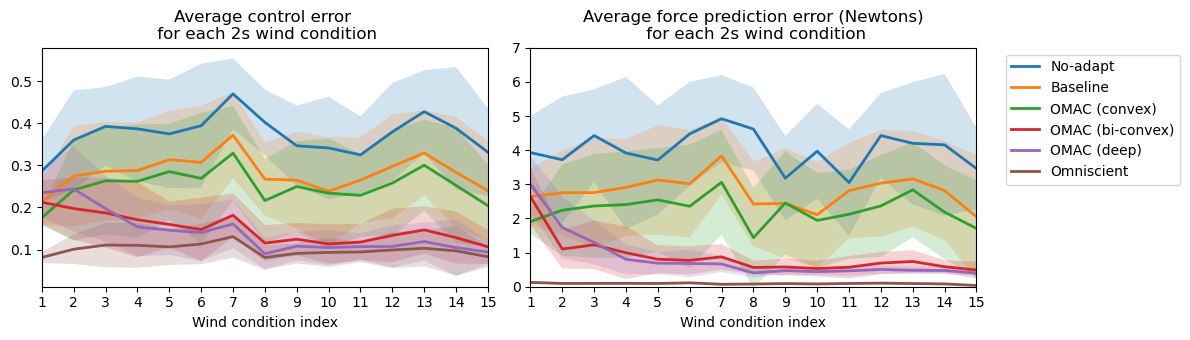

In [67]:
plt.figure(figsize=(12,3.5))

for j in range(6): #(1,2,3,4,5,0):
    data = Data[j]
    print( CTRLS[j]._name)
    
    paves = [] # (k, m): k trial number, m is condition index
    faves = [] # (k, m): k trial number, m is condition index
    for k, d in enumerate(data): # data has 50 datasets
        paves.append([])
        faves.append([])
        # m = 0 # index in paves
        psum = 0.
        fsum = 0.
        count = 0
        for i, t in enumerate(d['t']): # loop over one dataset
            psum += np.linalg.norm(d['X'][i, [0, 1, 2, 7, 8, 9]]) # assume desired position is 0
            if CTRLS[j]._name == 'pid':
                fsum += np.linalg.norm(d['Fs'][i,:])   
            else: 
                fsum += np.linalg.norm(d['f_hat'][i,0,:] - d['Fs'][i,:])
            count += 1
            if (d['meta_adapt_trigger'][i] and i > 10) or i == len(d['t']) - 1:
                pave = psum / count
                fave = fsum / count
                count = 0

                paves[-1].append(pave)
                faves[-1].append(fave)

                psum = 0.
                fsum = 0.
                count = 0
    print(np.array(paves).shape)

    p_mean = np.mean(paves, axis=0)
    p_std = np.std(paves, axis=0)
    f_mean = np.mean(faves, axis=0)
    f_std = np.std(faves, axis=0)

    # Plot the mean position tracking error for each wind condition
    plt.subplot(1,2,1)
    plt.plot(np.arange(15)+1, p_mean, lw=2, label = CTRLS[j].name_long)
    plt.fill_between(np.arange(15)+1, p_mean - p_std, p_mean + p_std, alpha = 0.2)
    plt.margins(x=0)
    plt.xlabel('Wind condition index')
    # plt.ylabel('ACE')
    plt.title('Average control error \n for each 2s wind condition')
    plt.xticks(np.arange(1,16))

    # Plot the mean force prediction error for each wind condition
    plt.subplot(1,2,2)
    plt.plot(np.arange(15)+1, f_mean, lw=2, label = CTRLS[j].name_long)
    plt.fill_between(np.arange(15)+1, f_mean - f_std, f_mean + f_std, alpha = 0.2)
    plt.margins(x=0)
    plt.xlabel('Wind condition index')
    plt.title('Average force prediction error (Newtons)\n for each 2s wind condition')
    plt.ylim((0,7))
    plt.tight_layout()
    plt.gca().legend(bbox_to_anchor=(1.05, 1.))

    plt.xticks(np.arange(1,16))

savefig('performance-stats-combined')


In [68]:
# Compute ACE for statistics table in the paper

print('%15s, %6s, %15s' % ('Controller', 'ACE', 'Steady State ACE'))

err = []
err_ss = []
for j, data in enumerate(Data):
    err.append([])
    err_ss.append([])
    c = CTRLS[j]
    for k, d in enumerate(data): # data has 50 datasets
        err[-1].append(np.mean(np.linalg.norm(d['X'][:,[0, 1, 2, 7, 8, 9]], axis=1)))
        err_ss[-1].append(np.mean(np.linalg.norm(d['X'][1000:,[0, 1, 2, 7, 8, 9]], axis=1)))
        # print('%15s, %5.4f, %5.4f' % (c._name, err[-1][-1], err_ss[-1][-1]))
print('error:')
print(np.mean(err, axis=1), '\nstd:\n', np.std(err, axis=1))
print('ss error:')
print(np.mean(err_ss, axis=1), '\nstd:\n', np.std(err_ss, axis=1))

     Controller,    ACE, Steady State ACE
error:
[0.37364733 0.28256648 0.25130911 0.14971051 0.14103576 0.09972835] 
std:
 [0.04408093 0.0426468  0.04341537 0.01884046 0.02423336 0.0180279 ]
ss error:
[0.38045495 0.28647929 0.254237   0.13161986 0.11369459 0.09865213] 
std:
 [0.05060592 0.04505493 0.044719   0.01654271 0.01936314 0.01830033]
